# Project 9: Analysis and Visualization

**Name**: Catelyn Clevenger

**Collaborators**:

**Sources**:
*   I used Gemini to help me draw the red, horizontal line where the x-axis should be on my bar chart.
*   I read this Colab notebook to figure out how to add Google Colab notebooks to my Github repository (https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)





##**Goal**: Using my Steam dataset, I want to explore the relationship between soundtrack reviews and game reviews to measure music's effects on users' gaming experiences.

## Data Cleaning and Wrangling

In [2]:
#First, I will import the necessary packagages for analyzing and visualizing dataframes.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Next I will create a pandas data frame for my steam ratings csv.
#I created this csv in my "Project 9: Data Collection" Colab Notebook.

reviews = pd.read_csv('/content/steam_reviews.csv')

In [4]:
#Already, I can see a duplicate row.  I believe that once I get rid of all the duplicates,
# the data frame will be much smaller.
print(reviews.shape)
print(reviews.head())

(912, 9)
   soundtrack_appid                        soundtrack_name  \
0            492140  Dead by Daylight: Original Soundtrack   
1           1266580                       eden* Soundtrack   
2            571010        ASTRONEER (Original Soundtrack)   
3            571010        ASTRONEER (Original Soundtrack)   
4           1079460                  Descenders Soundtrack   

   soundtrack_reviews  soundtrack_positive_percentage  main_game_appid  \
0                 315                           77.14           381210   
1                  28                           82.14           315810   
2                 109                           85.32           361420   
3                 109                           85.32           361420   
4                  40                           80.00           681280   

     main_game_name  main_game_reviews  main_game_positive_percentage  \
0  Dead by Daylight             575923                          79.03   
1             eden*        

In [5]:
# I will get rid of all the duplicate rows in pd_reviews by checking the values in the column, "soundtrack_appid".
# I've decided that I won't check for duplicate main_game_appids because one game may include multiple different soundtracks
# as downloadable content.

clean_reviews = reviews.drop_duplicates(subset=['soundtrack_appid', 'soundtrack_name'])

In [6]:
# From 912 rows to 335 rows...  I need to check back on my data collection code to see if it is creating duplicates.

print(clean_reviews.shape)
print(clean_reviews.head())

(335, 9)
   soundtrack_appid                        soundtrack_name  \
0            492140  Dead by Daylight: Original Soundtrack   
1           1266580                       eden* Soundtrack   
2            571010        ASTRONEER (Original Soundtrack)   
4           1079460                  Descenders Soundtrack   
7           1797050   Age of Empires IV Digital Soundtrack   

   soundtrack_reviews  soundtrack_positive_percentage  main_game_appid  \
0                 315                           77.14           381210   
1                  28                           82.14           315810   
2                 109                           85.32           361420   
4                  40                           80.00           681280   
7                  49                           79.59          1466860   

                           main_game_name  main_game_reviews  \
0                        Dead by Daylight             575923   
1                                   eden*    

In [7]:
clean_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 0 to 909
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   soundtrack_appid                335 non-null    int64  
 1   soundtrack_name                 335 non-null    object 
 2   soundtrack_reviews              335 non-null    int64  
 3   soundtrack_positive_percentage  335 non-null    float64
 4   main_game_appid                 335 non-null    int64  
 5   main_game_name                  335 non-null    object 
 6   main_game_reviews               335 non-null    int64  
 7   main_game_positive_percentage   335 non-null    float64
 8   main_game_genre                 335 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 26.2+ KB


In [8]:
# I decided to check for incorrect percentage values by seeing if any of the values were less than 0 or greater than 100.
# It looks like none of the percentage values are invalid.
print(clean_reviews[clean_reviews['soundtrack_positive_percentage'] < 0].shape)
print(clean_reviews[clean_reviews['main_game_positive_percentage'] < 0].shape)
print(clean_reviews[clean_reviews['soundtrack_positive_percentage'] > 100].shape)
print(clean_reviews[clean_reviews['soundtrack_positive_percentage'] > 100].shape)

(0, 9)
(0, 9)
(0, 9)
(0, 9)


## **Question 1**: How do the top 10 most positively rated games compare to the top 10 most positively rated soundtracks?

In [9]:
# To find the top 10 positively rated soundtracks, I can sort my dataframe in descending order of the
# soundtrack positive percentage column.  If two soundtracks have the same percentage, I've decided that soundtracks
# with more reviews should be placed higher.

sorted_soundtrack_reviews = clean_reviews.sort_values(by=['soundtrack_positive_percentage', 'soundtrack_reviews'], ascending=False)

print(sorted_soundtrack_reviews[['soundtrack_name','soundtrack_reviews','soundtrack_positive_percentage']].head(10))

                                       soundtrack_name  soundtrack_reviews  \
242         Doki Doki Literature Club Plus! Soundtrack                 123   
229  OPUS: Echo of Starsong Original Soundtrack -Be...                 104   
207                            Barotrauma - Soundtrack                  77   
173                Devil May Cry 5 Original Soundtrack                  72   
92          ATRI -My Dear Moments- Original Soundtrack                  66   
568                           Pony Island - Soundtrack                  60   
523  Touhou Hero of Ice Fairy - Rose Idol Soundtrac...                  59   
899                      Nekojishi Original Soundtrack                  58   
848                      The Forever Winter Soundtrack                  54   
41   Warhammer 40,000: Mechanicus - Complete Origin...                  52   

     soundtrack_positive_percentage  
242                           100.0  
229                           100.0  
207                        

In [10]:
# I can do the same thing with the top 10 positively rated games by sorting using the main game positive percentage column.

sorted_game_reviews = clean_reviews.sort_values(by=['main_game_positive_percentage' , 'main_game_reviews'], ascending=False)

print(sorted_game_reviews[['main_game_name','main_game_reviews','main_game_positive_percentage']].head(10))


                    main_game_name  main_game_reviews  \
801  Our Life: Beginnings & Always                422   
203                   The Upturned               2164   
157              Threefold Recital               2601   
129          Epic Battle Fantasy 5               5085   
747         I Wani Hug that Gator!               4327   
92          ATRI -My Dear Moments-              19420   
70               Vampire Survivors             236877   
526                 Stardew Valley             750258   
328                    Pizza Tower              60248   
17                           Hades             257678   

     main_game_positive_percentage  
801                          99.53  
203                          99.26  
157                          98.92  
129                          98.68  
747                          98.64  
92                           98.63  
70                           98.51  
526                          98.48  
328                          98.45  
17

### **Analysis and Reflection**:
Only one of the top 10 positively rated soundtracks (ATRI -My Dear Moments- Original Soundtrack) has its corresponding game in the top 10 positively rated games (ATRI -My Dear Moments-).

Interestingly, all the top 10 soundtrack positive rating percentages are 100%, while the top 10 games' positive percentages only reach 99.53%.  The games also have significantly more reviews than the soundtracks.  I wonder if the top soundtracks' 100% positive reviews are due to people knowing that they like the soundtrack before purchasing it, since they played the game.

## **Question 2**: Is there a strong correlation between a soundtrack's positive rating percentage and its game's positive rating percentage?

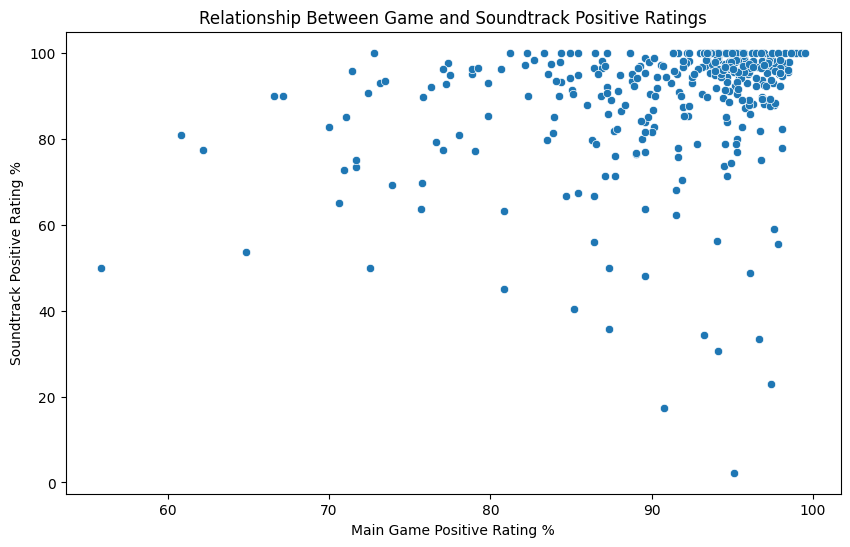

In [11]:
#I will create a scatter plot from clean_reviews to visualize the relationship between soundtrack positive rating percentage and
# game positive rating percentage.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='main_game_positive_percentage', y='soundtrack_positive_percentage', data=clean_reviews)
plt.title('Relationship Between Game and Soundtrack Positive Ratings')
plt.xlabel('Main Game Positive Rating %')
plt.ylabel('Soundtrack Positive Rating %')
plt.show()


In [12]:
# Next, I will calculate the correlation between the 'soundtrack_positive_percentage' and the 'main_game_positive_percentage' columns.

correlation = clean_reviews['soundtrack_positive_percentage'].corr(clean_reviews['main_game_positive_percentage'])
print(f"The correlation between soundtrack positive percentage and main game positive percentage is: {correlation}")


The correlation between soundtrack positive percentage and main game positive percentage is: 0.24681799180422356


In [16]:
# I want to visualize the correlations between all the numerical variables.  Are there any variables that have a larger correlation coefficient,
# and therefore, might be better to focus on?
corr_matrix = clean_reviews[['soundtrack_positive_percentage', 'soundtrack_reviews', 'main_game_positive_percentage', 'soundtrack_reviews']].corr()

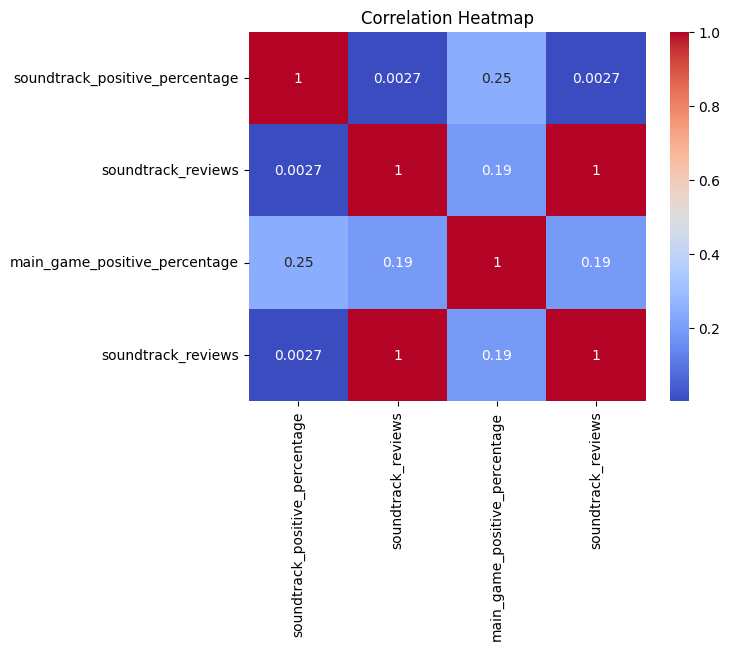

In [17]:
# It seems that soundtrack_positive_percentage and main_game_positive_percentage have the highest correlation coefficient
# compared to the other variables.

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### **Analysis and Reflection**:
Based on my two visualizations and my correlation coefficient calculation, the percentage of positive ratings for a soundtrack has a weak, positive correlation with the percentage of positive ratings for its affiliated game.  This weak correlation suggests that a game's music may not be a main factor for players when deciding whether they enjoy the game.

## **Question 3**: Does a game's genre affect the relationship between player ratings for the game and ratings for the soundtrack?

In [18]:
# This is how my dataset is distributed based on genre.  The action genre contains the most games by far.
# Also, Google Translate says that "アクション" means "action".
print(clean_reviews.groupby('main_game_genre').size())

main_game_genre
Action          157
Adventure        66
Casual           15
Free To Play      2
Indie            33
RPG              11
Racing            1
Simulation        9
Strategy          8
Unknown          32
アクション             1
dtype: int64


In [20]:
# I want to determine the correlation coefficient for each genre of games

# Extract the correlation values
unique_genres = clean_reviews['main_game_genre'].unique()

# I will create a list of dictionaries to store the genres and their corresponding correlations
genre_correlations = []
for genre in unique_genres:
    subset = clean_reviews[clean_reviews['main_game_genre'] == genre]
    genre_correlations.append({genre : subset['main_game_positive_percentage'].corr(subset['soundtrack_positive_percentage'])})

print(genre_correlations)

[{'Action': np.float64(0.3704391987196537)}, {'Adventure': np.float64(0.24029475199034334)}, {'Strategy': np.float64(-0.14417954666490965)}, {'Indie': np.float64(-0.09641778958988007)}, {'Casual': np.float64(0.09523194364266684)}, {'Simulation': np.float64(0.7542826467306931)}, {'Racing': np.float64(nan)}, {'RPG': np.float64(-0.15774399108949758)}, {'Free To Play': np.float64(1.0)}, {'アクション': np.float64(nan)}, {'Unknown': np.float64(-0.06351714152567564)}]


In [21]:
# I only want to keep non-NaN correlation values when creating my bar chart visualization.
# I also don't want 'Unknown' to be plotted as a game genre.
indices_to_keep = [0, 1, 2, 3, 4, 5, 7, 8]

# Filter by index
filtered_list_by_index = [genre_correlations[i] for i in indices_to_keep]

print(filtered_list_by_index)

[{'Action': np.float64(0.3704391987196537)}, {'Adventure': np.float64(0.24029475199034334)}, {'Strategy': np.float64(-0.14417954666490965)}, {'Indie': np.float64(-0.09641778958988007)}, {'Casual': np.float64(0.09523194364266684)}, {'Simulation': np.float64(0.7542826467306931)}, {'RPG': np.float64(-0.15774399108949758)}, {'Free To Play': np.float64(1.0)}]


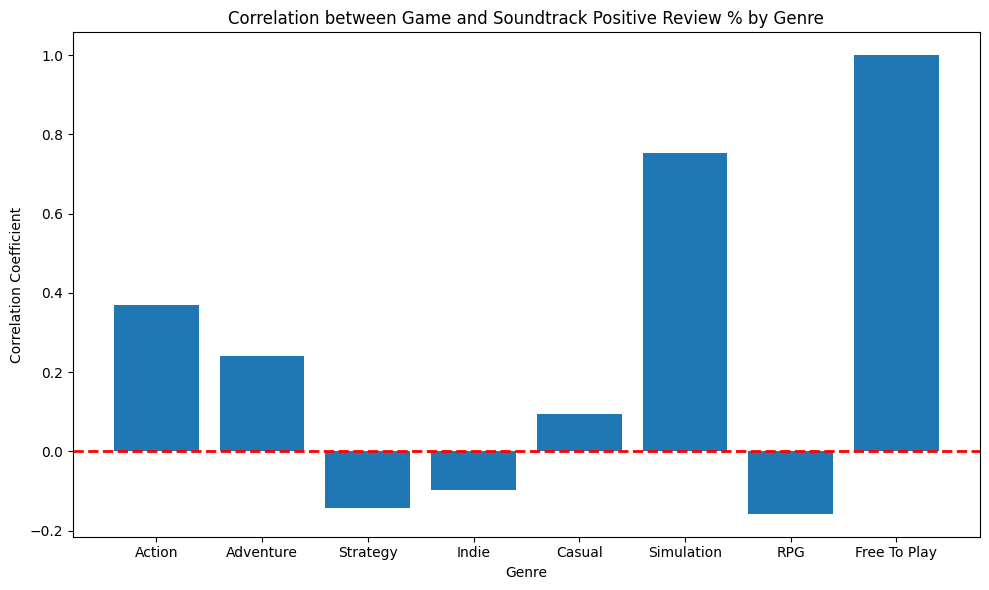

In [22]:
# Create the bar chart
genres = [list(d.keys())[0] for d in filtered_list_by_index]
correlations = [list(d.values())[0] for d in filtered_list_by_index]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(genres, correlations)
plt.axhline(0, color='red', linewidth=2, linestyle='--')  # Red dashed line at y=0
plt.title('Correlation between Game and Soundtrack Positive Review % by Genre')
plt.xlabel('Genre')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

### **Analysis and Reflection**:
There are noticeable differences between each bar on the bar chart,  suggesting that genre affects the relationship between a player's experience with the game's music and their overall experience playing the game.  However, some of these correlation coefficients are likely impacted by game genres that have very few games from the dataset.  For example, free-to-play has a correlation of 1.0, which could be explained by the genre only having two games from the dataset.  The two games could have identical positive review percentages to their soundtracks.

In the future, I could make my comparison of the correlation coefficients more reliable by ensuring that each game genre has a minimum number of games in the dataset.


# Reflection:


In summary, there was no strong correlation between users' ratings of a soundtrack and users' ratings of a game.  
In the future, I want to explore different elements of sound design.  Several sound design elements could be explored by analyzing what players write in their game reviews rather than focusing on the review statistics.